In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import keras
import cv2
import numpy as np
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tf_keras as tfk


# print("TensorFlow version:", tf.__version__)
# print("TensorFlow Hub version:", hub.__version__)


In [2]:
m = tfk.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=(224, 224, 3))
])
m.summary()


# IMAGE_SHAPE = (224, 224)

# classifier = tf.keras.Sequential([
#     hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
# ])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
Total params: 3540265 (13.51 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


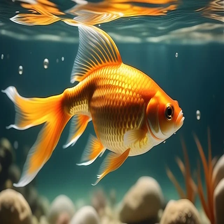

In [5]:
kunje_gold = Image.open('goldfish-8527927_640.webp').resize((224,224))
kunje_gold


In [7]:
kunje_gold = np.array(kunje_gold)/255.0
kunje_gold

array([[[0.00032295, 0.00066128, 0.0007228 ],
        [0.00033833, 0.00064591, 0.0007228 ],
        [0.00035371, 0.00066128, 0.00069204],
        ...,
        [0.00103037, 0.00084583, 0.00067666],
        [0.00110727, 0.00087659, 0.00073818],
        [0.00152249, 0.00130719, 0.00116878]],

       [[0.00027682, 0.00061515, 0.00067666],
        [0.0002922 , 0.00059977, 0.00067666],
        [0.0002922 , 0.00061515, 0.00064591],
        ...,
        [0.0018762 , 0.00170704, 0.00141484],
        [0.00222991, 0.00202999, 0.00176855],
        [0.00262976, 0.00242983, 0.0021684 ]],

       [[0.00026144, 0.00059977, 0.00066128],
        [0.00026144, 0.00058439, 0.00064591],
        [0.00026144, 0.00056901, 0.00061515],
        ...,
        [0.00262976, 0.00246059, 0.00207612],
        [0.00272203, 0.00253749, 0.0021684 ],
        [0.00287582, 0.00267589, 0.00233756]],

       ...,

       [[0.00052288, 0.0004306 , 0.0002922 ],
        [0.00052288, 0.0004306 , 0.0002922 ],
        [0.00053825, 0

In [17]:
kunje_gold[np.newaxis, ...].shape
# HERE ADDING ONE MORE DIMENSION AS PREDICTION IS EXPECTING MULTIPLE IMAGES AS INPUT,
# SO WE NEED TO ADD 1 FOR THIS SINGLE IMAGE

(1, 224, 224, 3)

In [18]:
with open("ImageNetLabels.txt",'r') as f:
    image_labels = f.read().splitlines()

image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [19]:
result = m.predict(kunje_gold[np.newaxis, ...])
result.shape

# THIS IS THE PREDICTION OF 1000 CLASSES 

1/1 [==============================] - 0s 350ms/step


(1, 1001)

In [20]:
labell = np.argmax(result)
image_labels[labell]

'spotlight'

In [38]:
def perdict_return_image(image):
    kunje_gold = Image.open(image).resize((224,224))
    kunje_gold_resize = np.array(kunje_gold)/255.0
    result = m.predict(kunje_gold_resize[np.newaxis, ...])
    labell = np.argmax(result)
    print(image_labels[labell])
    plt.imshow(kunje_gold)
    plt.axis('off')



1/1 [==============================] - 0s 363ms/step
goldfish


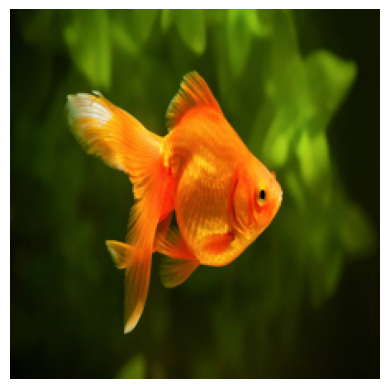

In [39]:
perdict_return_image('gold-fish-1.jpg')

1/1 [==============================] - 0s 323ms/step
tiger


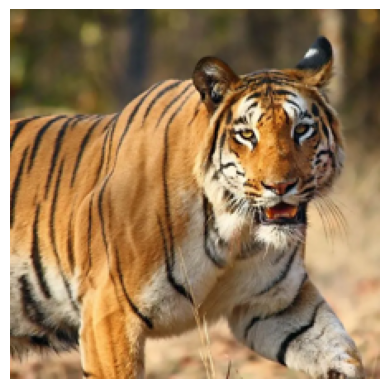

In [40]:
perdict_return_image('tiger.webp')

In [3]:
dataseturl = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file("flower_photos",origin=dataseturl,cache_dir=".",untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 92s 0us/step


In [43]:
data_dir
# '.\\datasets\\flower_photos'

data_dir = '.\\datasets\\flower_photos\\flower_photos'
data_dir

'.\\datasets\\flower_photos\\flower_photos'

In [48]:
# COPYING THE CODES WHICH I HAD DONE ON PREVIOUS WORK
# THIS PROJECT IS ABOUT IMPROVING THAT WORK AND LEARN ABOUT TRANSFER LEARNING
# ALL DETAILED WORKS ARE PROVIDED THERE
# BELOW IS THE LINK TO CONNECT TO THAT PROJECT
# https://drive.google.com/file/d/17K56IhbfozLA_o8SRliuAUqir93Tq5OB/view?usp=sharing

import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

flower_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

flower_image_dict

flowers_label_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

x, y = [],[]

for flower,images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        rez_img = cv2.resize(img,(224,224))
        x.append(rez_img)
        y.append(flowers_label_dict[flower])

from sklearn.model_selection import train_test_split

x = np.array(x)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

print("LENGTH OF X TRAIN : ",len(x_train))
print("LENGTH OF X TEST : ",len(x_test))

x_train_sc = x_train/255
x_test_sc = x_test/255

LENGTH OF X TRAIN :  2752
LENGTH OF X TEST :  918


In [52]:
predicted = m.predict(np.array([x[0],x[1],x[2]]))
predicted = np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 0s 81ms/step


array([795, 880, 795], dtype=int64)

shower curtain


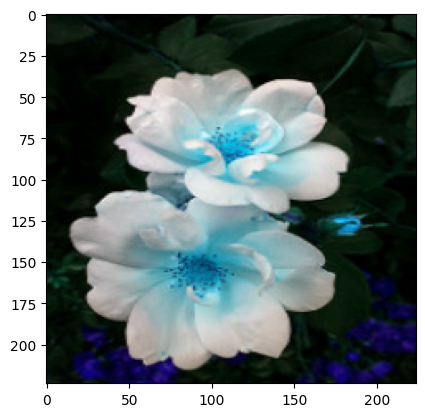

In [58]:
print(image_labels[795])
plt.imshow(x[0])

sliding door


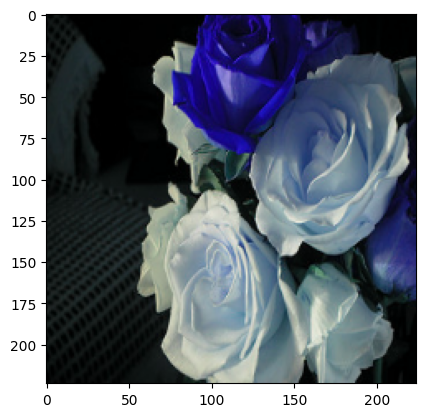

In [59]:
print(image_labels[800])
plt.imshow(x[1])

In [60]:
# feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

pretrained_model_without_top_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=(224, 224, 3),trainable=False)


In [65]:
number_of_flower_category = 5

model = tfk.Sequential([
    pretrained_model_without_top_layer,
    tfk.layers.Dense(number_of_flower_category)
])

model.summary

<bound method Model.summary of <tf_keras.src.engine.sequential.Sequential object at 0x00000236EE003910>>

In [66]:
model.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_sc,y_train,epochs=5)

Epoch 1/5



86/86 [==============================] - 31s 313ms/step - loss: 0.8249 - accuracy: 0.7049
Epoch 2/5
86/86 [==============================] - 27s 316ms/step - loss: 0.4001 - accuracy: 0.8590
Epoch 3/5
86/86 [==============================] - 28s 330ms/step - loss: 0.3171 - accuracy: 0.8877
Epoch 4/5
86/86 [==============================] - 28s 322ms/step - loss: 0.2664 - accuracy: 0.9081
Epoch 5/5
86/86 [==============================] - 28s 330ms/step - loss: 0.2318 - accuracy: 0.9208


In [70]:
model.evaluate(x_test_sc,y_test)

29/29 [==============================] - 10s 306ms/step - loss: 0.4225 - accuracy: 0.8693


[0.42251357436180115, 0.8692810535430908]

In [68]:
predictions = model.predict(x_test_sc)

score = tf.nn.softmax(predictions[0])
print(np.argmax(score))

print(y_test[0])

29/29 [==============================] - 10s 308ms/step
4
4


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.85      0.86      0.86       149
           2       0.89      0.94      0.91       237
           3       0.89      0.84      0.86       170
           4       0.88      0.81      0.84       205

    accuracy                           0.87       918
   macro avg       0.87      0.87      0.87       918
weighted avg       0.87      0.87      0.87       918



<Axes: >

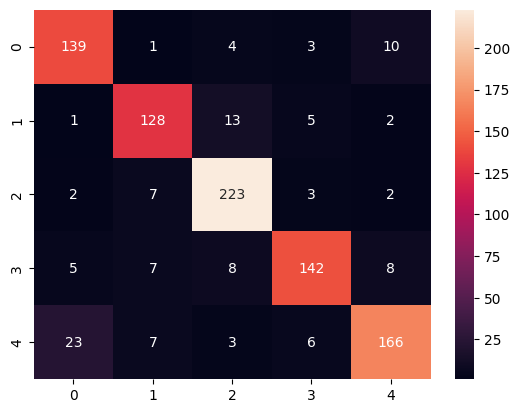

In [69]:
from sklearn.metrics import classification_report
import seaborn as sn

total_score = score = tf.nn.softmax(predictions)
y_predicted = [np.argmax(i) for i in total_score]

classification_report = classification_report(y_test,y_predicted)
print(classification_report)

c_matrix = tf.math.confusion_matrix(y_test,y_predicted)
sn.heatmap(c_matrix,annot=True,fmt='d')

In [71]:
number_of_flower_category = 5

model = tfk.Sequential([
    pretrained_model_without_top_layer,
    tfk.layers.Dense(number_of_flower_category)
])

model.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_sc,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 39s 378ms/step - loss: 0.8264 - accuracy: 0.7046
Epoch 2/30
86/86 [==============================] - 31s 361ms/step - loss: 0.3920 - accuracy: 0.8630
Epoch 3/30
86/86 [==============================] - 30s 347ms/step - loss: 0.3064 - accuracy: 0.8950
Epoch 4/30
86/86 [==============================] - 30s 352ms/step - loss: 0.2548 - accuracy: 0.9146
Epoch 5/30
86/86 [==============================] - 30s 353ms/step - loss: 0.2200 - accuracy: 0.9302
Epoch 6/30
86/86 [==============================] - 28s 324ms/step - loss: 0.1983 - accuracy: 0.9382
Epoch 7/30
86/86 [==============================] - 27s 316ms/step - loss: 0.1785 - accuracy: 0.9473
Epoch 8/30
86/86 [==============================] - 28s 326ms/step - loss: 0.1589 - accuracy: 0.9513
Epoch 9/30
86/86 [==============================] - 30s 351ms/step - loss: 0.1487 - accuracy: 0.9600
Epoch 10/30
86/86 [==============================] - 30s 346ms/step - loss: 0.1360 - accura

In [72]:
model.save('my_flower_transfer_model')

INFO:tensorflow:Assets written to: my_flower_transfer_model\assets


INFO:tensorflow:Assets written to: my_flower_transfer_model\assets


In [73]:
model.evaluate(x_test_sc,y_test)

29/29 [==============================] - 11s 345ms/step - loss: 0.6256 - accuracy: 0.8573


[0.625643789768219, 0.8572984933853149]

In [75]:
predictions = model.predict(x_test_sc)

score = tf.nn.softmax(predictions[1])
print(np.argmax(score))

print(y_test[1])

29/29 [==============================] - 10s 334ms/step
4
4


              precision    recall  f1-score   support

           0       0.86      0.80      0.83       157
           1       0.84      0.91      0.87       149
           2       0.90      0.92      0.91       237
           3       0.87      0.80      0.83       170
           4       0.81      0.84      0.82       205

    accuracy                           0.86       918
   macro avg       0.86      0.85      0.85       918
weighted avg       0.86      0.86      0.86       918



<Axes: >

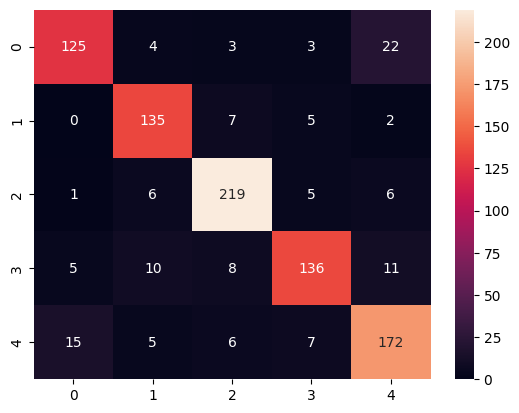

In [76]:
from sklearn.metrics import classification_report
import seaborn as sn

total_score = score = tf.nn.softmax(predictions)
y_predicted = [np.argmax(i) for i in total_score]

classification_report = classification_report(y_test,y_predicted)
print(classification_report)

c_matrix = tf.math.confusion_matrix(y_test,y_predicted)
sn.heatmap(c_matrix,annot=True,fmt='d')